## Librairies

In [102]:
import pandas as pd
import numpy as np
import scipy.stats
import math
import os
import matplotlib.pyplot as plt
#%matplotlib inline

## Input

In [103]:
L = 20
h = 2.06
l = 2.11

In [117]:
in_df = pd.read_csv('Data/input.csv', sep = ';')
in_df = in_df.set_index('Material')
#in_df.index = in_df.Material.values

In [118]:
in_df

,l,h,L
Material,,,
3M ESPE Filtek Supreme XTE,2.06,2.11,20
Clearfil APX,2.06,2.11,20
Clearfil DC Core Plus,2.06,2.11,20
Clearfil Majesty Post,2.06,2.11,20
Clearfil PhotoCore,2.06,2.11,20
Core-X-Flow,2.06,2.11,20
Gradia Core,2.06,2.11,20
Grandio,2.06,2.11,20
Grandio Core,2.06,2.11,20


## Support Function

In [119]:
def getMeYoung(file_path, L,h,l):

    ### Data Loading & Preparation
    a = pd.read_csv(file_path, sep = '\t')
    X = a.loc[1:] # first line is empty
    X.columns = ['Force', 'Deformation']

    ### Cleaning in order to proper filter on the Deformation [0.01, 0.1]
    ix = (X.loc[:, 'Deformation'] > 0.01) & (X.loc[:, 'Deformation'] < 0.1 )
    X = X.loc[ix]

    try:
        ### Compute Slope
        slope, _, _, _, _ = scipy.stats.linregress(X.loc[:, 'Deformation'], X.loc[:, 'Force'])

        ### Compute Young Module
        E = L**3 * slope / (4 * l * h**3) / 1000
    except:
        E = None

    return E

## Make the loop

In [120]:
YM = []
Material = []
XP = []

path = 'Data/ech_de_adri'

for d in os.listdir(path): ## Loop on the directories
    if d != '.DS_Store':
        for f in os.listdir(path + '/' + d):
            f_path = path + '/' + d + '/' + f
            ## Compute the Young Module
            YM.append(getMeYoung(f_path,in_df.loc[d,'L'],in_df.loc[d,'h'],in_df.loc[d,'l']))
            
            ## Update the Material
            Material.append(d)
            
            ## Update of the experimentator
            XP.append('Adri')
            
            
path = 'Data/ech_de_ali'
for d in os.listdir(path): ## Loop on the directories
    if d != '.DS_Store':
        for f in os.listdir(path + '/' + d):
            f_path = path + '/' + d + '/' + f
            ## Compute the Young Module
            YM.append(getMeYoung(f_path,in_df.loc[d,'L'],in_df.loc[d,'h'],in_df.loc[d,'l']))
            #YM.append(getMeYoung(f_path,L,h,l))
            
            ## Update the Material
            Material.append(d)
            
            ## Update of the experimentator
            XP.append('Ali')

## Final Res

In [121]:
final_res = pd.DataFrame()

In [122]:
final_res.loc[:, 'Material']       = Material
final_res.loc[:, 'Experimentator'] = XP
final_res.loc[:, 'Young Module']   = YM

In [123]:
final_res.to_csv('final_res.csv', index = False, sep = ';')

In [124]:
final_res.loc[final_res.Material == 'Luxacore Z Dual']

,Material,Experimentator,Young Module
90,Luxacore Z Dual,Adri,4.262975
91,Luxacore Z Dual,Adri,4.236639
92,Luxacore Z Dual,Adri,4.212527
93,Luxacore Z Dual,Adri,3.840102
94,Luxacore Z Dual,Adri,4.675088
95,Luxacore Z Dual,Adri,4.679405
96,Luxacore Z Dual,Adri,4.758057
97,Luxacore Z Dual,Adri,NaN
98,Luxacore Z Dual,Adri,4.393672
99,Luxacore Z Dual,Adri,3.779286


## Mean / Variance Matrix

In [125]:
final_res

,Material,Experimentator,Young Module
0,3M ESPE Filtek Supreme XTE,Adri,5.993606
1,3M ESPE Filtek Supreme XTE,Adri,5.734716
2,3M ESPE Filtek Supreme XTE,Adri,7.508951
3,3M ESPE Filtek Supreme XTE,Adri,6.226113
4,3M ESPE Filtek Supreme XTE,Adri,5.628220
5,3M ESPE Filtek Supreme XTE,Adri,6.028661
6,3M ESPE Filtek Supreme XTE,Adri,5.185641
7,3M ESPE Filtek Supreme XTE,Adri,7.913216
8,3M ESPE Filtek Supreme XTE,Adri,6.655838
9,3M ESPE Filtek Supreme XTE,Adri,7.216161


In [126]:
final_res.loc[(final_res.Material == 'Permaflow'), :]

,Material,Experimentator,Young Module
272,Permaflow,Ali,5.217816
273,Permaflow,Ali,4.535086
274,Permaflow,Ali,5.313864
275,Permaflow,Ali,4.323740
276,Permaflow,Ali,4.162661
277,Permaflow,Ali,5.250727
278,Permaflow,Ali,4.433052
279,Permaflow,Ali,5.433615
280,Permaflow,Ali,6.125231
281,Permaflow,Ali,6.046706


In [127]:
meanvar_matrix = pd.DataFrame(index = set(Material), columns = ['mu', 'var'])
for m in set(Material):
    print(m)
    val = final_res.loc[(final_res.Material == m) & (~final_res.loc[:, 'Young Module'].isnull()), 'Young Module']
    meanvar_matrix.loc[m, 'mu']  = val.mean()
    meanvar_matrix.loc[m, 'var'] = val.var()

Clearfil DC Core Plus
Rebilda DC
Gradia Core
Multicore Flow
Grandio Core
N'Durance Dimmer Core
Tetrc Evoceram
Luxacore Z Dual
Grandio
Permaflow
Clearfil Majesty Post
Clearfil APX
3M ESPE Filtek Supreme XTE
Rebilda SC
Core-X-Flow
Clearfil PhotoCore


In [128]:
meanvar_matrix.to_csv('meanvar.csv', index = True, sep = ';')

In [129]:
meanvar_matrix

,mu,var
Clearfil DC Core Plus,5.74596,0.952733
Rebilda DC,5.58845,0.654096
Gradia Core,8.12684,2.02814
Multicore Flow,5.63117,0.861628
Grandio Core,5.90529,0.88238
N'Durance Dimmer Core,3.02331,0.341695
Tetrc Evoceram,6.18221,1.68829
Luxacore Z Dual,4.62051,0.601122
Grandio,9.71921,2.47156
Permaflow,5.08425,0.487071


## P-values matrix

In [130]:
pval_matrix = pd.DataFrame(index = set(Material), columns = set(Material))

In [131]:
for m1 in set(Material):
    for m2 in set(Material):
        val_1 = final_res.loc[(final_res.Material == m1) & (~final_res.loc[:, 'Young Module'].isnull()), 'Young Module']
        val_2 = final_res.loc[(final_res.Material == m2) & (~final_res.loc[:, 'Young Module'].isnull()), 'Young Module']
        pval_matrix.loc[m1,m2] = scipy.stats.ttest_ind(val_1,  val_2).pvalue

In [132]:
pval_matrix.to_csv('pval_matrix.csv', index = True, sep = ';')

In [133]:
pval_matrix

,Clearfil DC Core Plus,Rebilda DC,Gradia Core,Multicore Flow,Grandio Core,N'Durance Dimmer Core,Tetrc Evoceram,Luxacore Z Dual,Grandio,Permaflow,Clearfil Majesty Post,Clearfil APX,3M ESPE Filtek Supreme XTE,Rebilda SC,Core-X-Flow,Clearfil PhotoCore
Clearfil DC Core Plus,1,0.581674,3.35868e-07,0.705244,0.601947,2.12017e-13,0.237372,0.000252436,1.04179e-11,0.0668878,5.27632e-10,5.35435e-14,0.076606,4.5998e-05,0.0117512,6.71878e-15
Rebilda DC,0.581674,1,3.04496e-08,0.877495,0.260137,2.62239e-14,0.0908473,0.000422173,9.93188e-13,0.104063,2.09949e-10,1.06509e-14,0.0175615,6.26673e-05,0.0010599,1.7099e-15
Gradia Core,3.35868e-07,3.04496e-08,1,9.5757e-08,9.94155e-07,6.33425e-18,6.03303e-05,8.58969e-12,0.00179941,7.2629e-07,1.44294e-05,1.55984e-07,7.04965e-05,2.22302e-12,7.54345e-05,2.97173e-09
Multicore Flow,0.705244,0.877495,9.5757e-08,1,0.35912,2.6151e-13,0.13106,0.000610778,3.28554e-12,0.112147,3.08567e-10,2.37501e-14,0.0324849,0.000110481,0.00325866,3.34832e-15
Grandio Core,0.601947,0.260137,9.94155e-07,0.35912,1,1.66025e-14,0.444651,3.1968e-05,2.3728e-11,0.021311,9.10607e-10,9.75334e-14,0.183457,5.01077e-06,0.0393895,1.13511e-14
N'Durance Dimmer Core,2.12017e-13,2.62239e-14,6.33425e-18,2.6151e-13,1.66025e-14,1,1.81349e-12,4.86318e-09,1.06433e-20,1.69143e-09,4.50617e-15,1.21639e-20,5.95434e-15,1.47552e-08,1.69055e-18,9.35216e-21
Tetrc Evoceram,0.237372,0.0908473,6.03303e-05,0.13106,0.444651,1.81349e-12,1,4.37358e-05,2.39354e-09,0.0192303,5.7433e-09,2.83782e-12,0.678529,1.0637e-05,0.362114,2.05673e-13
Luxacore Z Dual,0.000252436,0.000422173,8.58969e-12,0.000610778,3.1968e-05,4.86318e-09,4.37358e-05,1,1.42817e-15,0.122224,5.1954e-12,9.76527e-17,1.204e-06,0.591588,5.78525e-09,2.92038e-17
Grandio,1.04179e-11,9.93188e-13,0.00179941,3.28554e-12,2.3728e-11,1.06433e-20,2.39354e-09,1.42817e-15,1,1.36746e-09,0.00528505,0.00115237,1.50872e-09,4.63031e-16,7.60513e-10,1.33126e-05
Permaflow,0.0668878,0.104063,7.2629e-07,0.112147,0.021311,1.69143e-09,0.0192303,0.122224,1.36746e-09,1,3.86498e-07,2.16854e-10,0.0025431,0.0427114,6.52871e-05,9.18312e-11


## Test

## Make a graph

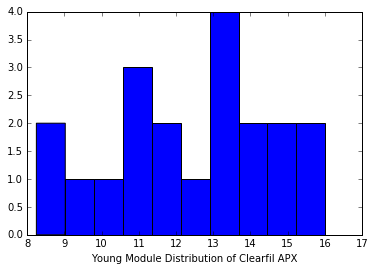

In [11]:
# ix = final_res.loc[:, 'Material'] == 'Clearfil APX'

# plt.hist(final_res.loc[ix, 'Young Module'])
# plt.xlabel('Young Module Distribution of Clearfil APX')
# plt.show()
# plt.savefig('Clearfill APX.png')

In [134]:
print('DONE DONE !')

DONE DONE !
